In [1]:
import pathlib as pl
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [2]:
# file reference for dataframe
json_file_path = pl.Path(os.path.abspath('')).parent.resolve() / "data_files/included_words_valset2_100k.json"

with open(json_file_path) as json_file:
    json_dict = json.load(json_file)

# creating dataframe
df_json = pd.DataFrame.from_dict({(word): json_dict[word]
                           for word in json_dict.keys()},
                       orient='index')


In [3]:
# filtering for fake and reliable and replacing NaN with [0,0]
df = df_json.copy()
df = df.filter(items=['fake', 'reliable'], axis=1)
df = df.rename(columns={'reliable':'real'})
df = df.applymap(lambda x: [0,0] if x is np.nan else x)

# unpacking tuples in columns fake and real
df['fake_art_freq'], df['fake_word_freq'] = zip(*df.fake)
df['real_art_freq'], df['real_word_freq'] = zip(*df.real)
df = df[df.real_word_freq != 0] # step 1: reduces from 14258 rows to 507 rows
df = df[df.fake_word_freq != 0] # step 2: reduces from 507 rows to 375 rows

df['fake_wa_ratio'] = round(df['fake_word_freq'] / df['fake_art_freq'],4)
df['real_wa_ratio'] = round(df['real_word_freq'] / df['real_art_freq'],4)

df['total_word_freq'] = df.fake_word_freq + df.real_word_freq

df = df.sort_values(by='total_word_freq', ascending=False)

#df["freq"] = round(df.iloc[:,0:9].sum(axis=1))
#df["freq_binary"] = df.fake + df.reliable
#df["ratio_binary"] = round(df.fake/df.reliable,4)
#df["score_binary"] = df.fake - df.reliable
#df = df.sort_values(by='freq_binary', ascending=False)
#df = df.sort_values(by='score_binary', ascending=False)

#print(f"Count of tokens when looking at all article types:          {len(df)}")
#df = df[df.freq_binary != 0]
#print(f"Count of tokens when looking only at 'fake' and 'reliable': {len(df)}")

In [65]:
df[0:10]

,fake,real,fake_art_freq,fake_word_freq,real_art_freq,real_word_freq,fake_wa_ratio,real_wa_ratio,total_word_freq
the,"[35997, 1078774]","[227, 12084]",35997,1078774,227,12084,29.9684,53.2335,1090858
of,"[34896, 560068]","[224, 5636]",34896,560068,224,5636,16.0496,25.1607,565704
and,"[33128, 551423]","[216, 4997]",33128,551423,216,4997,16.6452,23.1343,556420
to,"[32932, 536918]","[225, 5990]",32932,536918,225,5990,16.3038,26.6222,542908
a,"[31588, 387857]","[222, 4038]",31588,387857,222,4038,12.2786,18.1892,391895
in,"[31798, 346764]","[224, 4051]",31798,346764,224,4051,10.9052,18.0848,350815
is,"[33615, 271157]","[213, 2100]",33615,271157,213,2100,8.0665,9.8592,273257
that,"[27184, 238841]","[215, 3328]",27184,238841,215,3328,8.7861,15.4791,242169
for,"[28948, 182005]","[206, 1954]",28948,182005,206,1954,6.2873,9.4854,183959
are,"[33155, 158606]","[197, 1078]",33155,158606,197,1078,4.7838,5.4721,159684


In [41]:
x = sum(df.total_word_freq)
y = sum(df.total_word_freq[:49])
z = x-y
print(y/x,x)

0.5018404330562932 14237410


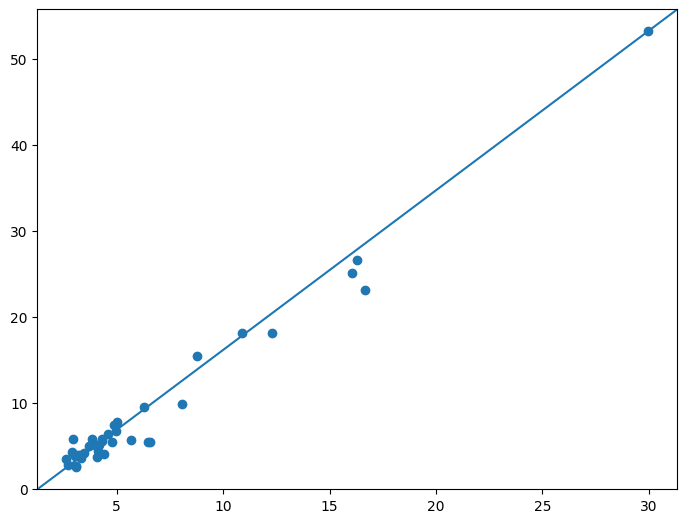

In [69]:
amount_ = 40
start_ = 0
end_ = start_ + amount_

ax = plt.figure().add_axes([0,0,1,1])
fake_ratio = df.fake_wa_ratio[start_:end_]
real_ratio = df.real_wa_ratio[start_:end_]
ax.scatter(fake_ratio, real_ratio)
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.show()


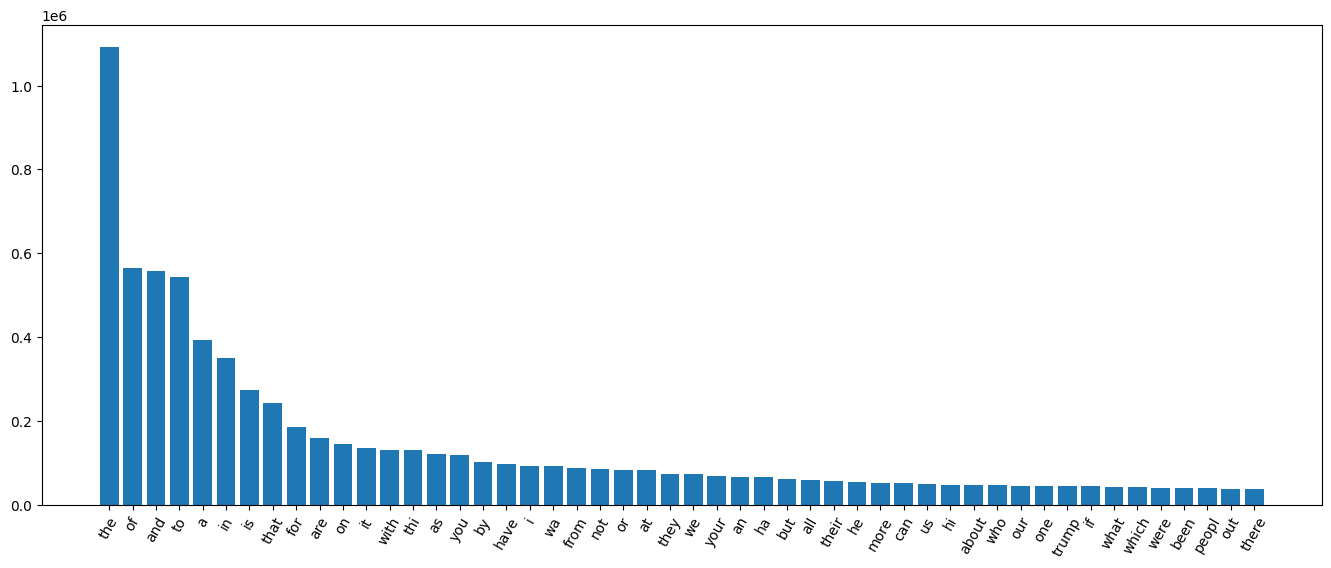

In [10]:
amount = 50
start = 0
end = start + amount

fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
word = df.axes[0][start:end]
#score = df.[start:end]
freq = df.total_word_freq[start:end]
axes.bar(word, freq)
plt.xticks(rotation=60)
plt.show()